In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn import tree
import pydotplus

In [2]:
raw_text = pd.read_csv('/Users/junjiexie/Documents/gu校内生活/additionalData/trumptweets.csv')

In [3]:
# avoid the vocabulary dictionary is too heavy
raw_text = raw_text.sample(n=2000)

In [4]:
raw_text

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
28209,706467532291624960,https://twitter.com/realDonaldTrump/status/706...,I will be interviewed on @ FaceTheNation this ...,2016-03-06 14:12:39,1281,5632,@ @,NaN,NaN
4855,276040994552700928,https://twitter.com/realDonaldTrump/status/276...,Great defense by the @ nyjets this weekend—con...,2012-12-04 20:11:16,46,12,@ @,NaN,NaN
38657,1158693498566131712,https://twitter.com/realDonaldTrump/status/115...,“It’s political season and the election is aro...,2019-08-06 12:57:12,16358,68785,@ @,NaN,NaN
30800,792734426912337920,https://twitter.com/realDonaldTrump/status/792...,"Wow, Twitter, Google and Facebook are burying ...",2016-10-30 15:26:30,31597,63148,NaN,NaN,NaN
36966,1106634712871784448,https://twitter.com/realDonaldTrump/status/110...,....that we stand in solidarity with New Zeala...,2019-03-15 20:14:10,15039,105403,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22932,603357923314638848,https://twitter.com/realDonaldTrump/status/603...,""" @ TrumpFerryPoint: Two great families come t...",2015-05-27 02:31:53,56,114,@ @,#,NaN
4751,273890598996549633,https://twitter.com/realDonaldTrump/status/273...,...Get along & make deals for the good of the ...,2012-11-28 21:46:22,149,44,NaN,NaN,NaN
7753,317222357422993408,https://twitter.com/realDonaldTrump/status/317...,""" @ jevonk: @ realDonaldTrump I thought you di...",2013-03-28 11:31:18,5,2,@ @,NaN,NaN
16515,491174630971813889,https://twitter.com/realDonaldTrump/status/491...,. @ McIlroyRory Great job Rory - you have the ...,2014-07-21 12:55:32,60,143,@,NaN,NaN


# Year before 2016 and after 2016 as Label

# Data Processing Part

In [5]:
from datetime import datetime

raw_text.date = pd.to_datetime(raw_text.date, format="%Y-%m-%d", errors='coerce')

In [6]:
def beforePresident(date):
    year = str(date)[:4]
    if int(year) <= 2016:
        return 0
    else:
        return 1


raw_text['label'] = raw_text.date.apply(lambda x: beforePresident(x))

# Clean Text Data and Create Vocabulary

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [8]:
import re

english_words = set(nltk.corpus.words.words())


def first_clean(text):
    rawData = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    return rawData


def clean_not_words(input):
    input = input.split()
    return [i for i in input if i in english_words and len(i) > 2]


def lemmed_word(input):
    lemmed = [WordNetLemmatizer().lemmatize(w) for w in input]
    return " ".join(lemmed)


sentence = raw_text['content']
first_clean_sentence = [first_clean(i) for i in sentence]
second_clean_sentence = [clean_not_words(i) for i in first_clean_sentence]
third_clean_sentence = [lemmed_word(i) for i in second_clean_sentence]

In [9]:
count = TfidfVectorizer(stop_words='english')
sentence_count = count.fit_transform(third_clean_sentence)

In [10]:
ColumnNames = count.get_feature_names()
DF_TF = pd.DataFrame(sentence_count.toarray(), columns=ColumnNames)

# Now we get the dataframe of word count in each tweet

In [188]:
DF_TF.head()

,abandon,abandoned,abey,ability,abject,able,abolish,abound,abroad,absolute,...,yesterday,yield,york,young,youth,yuan,zak,zeal,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
DF_TF["text_label"] = [i for i in raw_text['label']]

In [12]:
# DF_TF is too heavy and we should subset part of it to train
dataset = DF_TF.sample(n=500)

In [14]:
dataset.to_csv('/Users/junjiexie/Documents/gu校内生活/additionalData/textDecisionTree.csv')

In [191]:
from collections import Counter

Counter(dataset['text_label'])

Counter({1: 132, 0: 368})

# Dataset for train and visualizations

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1:], test_size=0.3,
                                                    random_state=0)

In [174]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.753


# Visualization tree 1

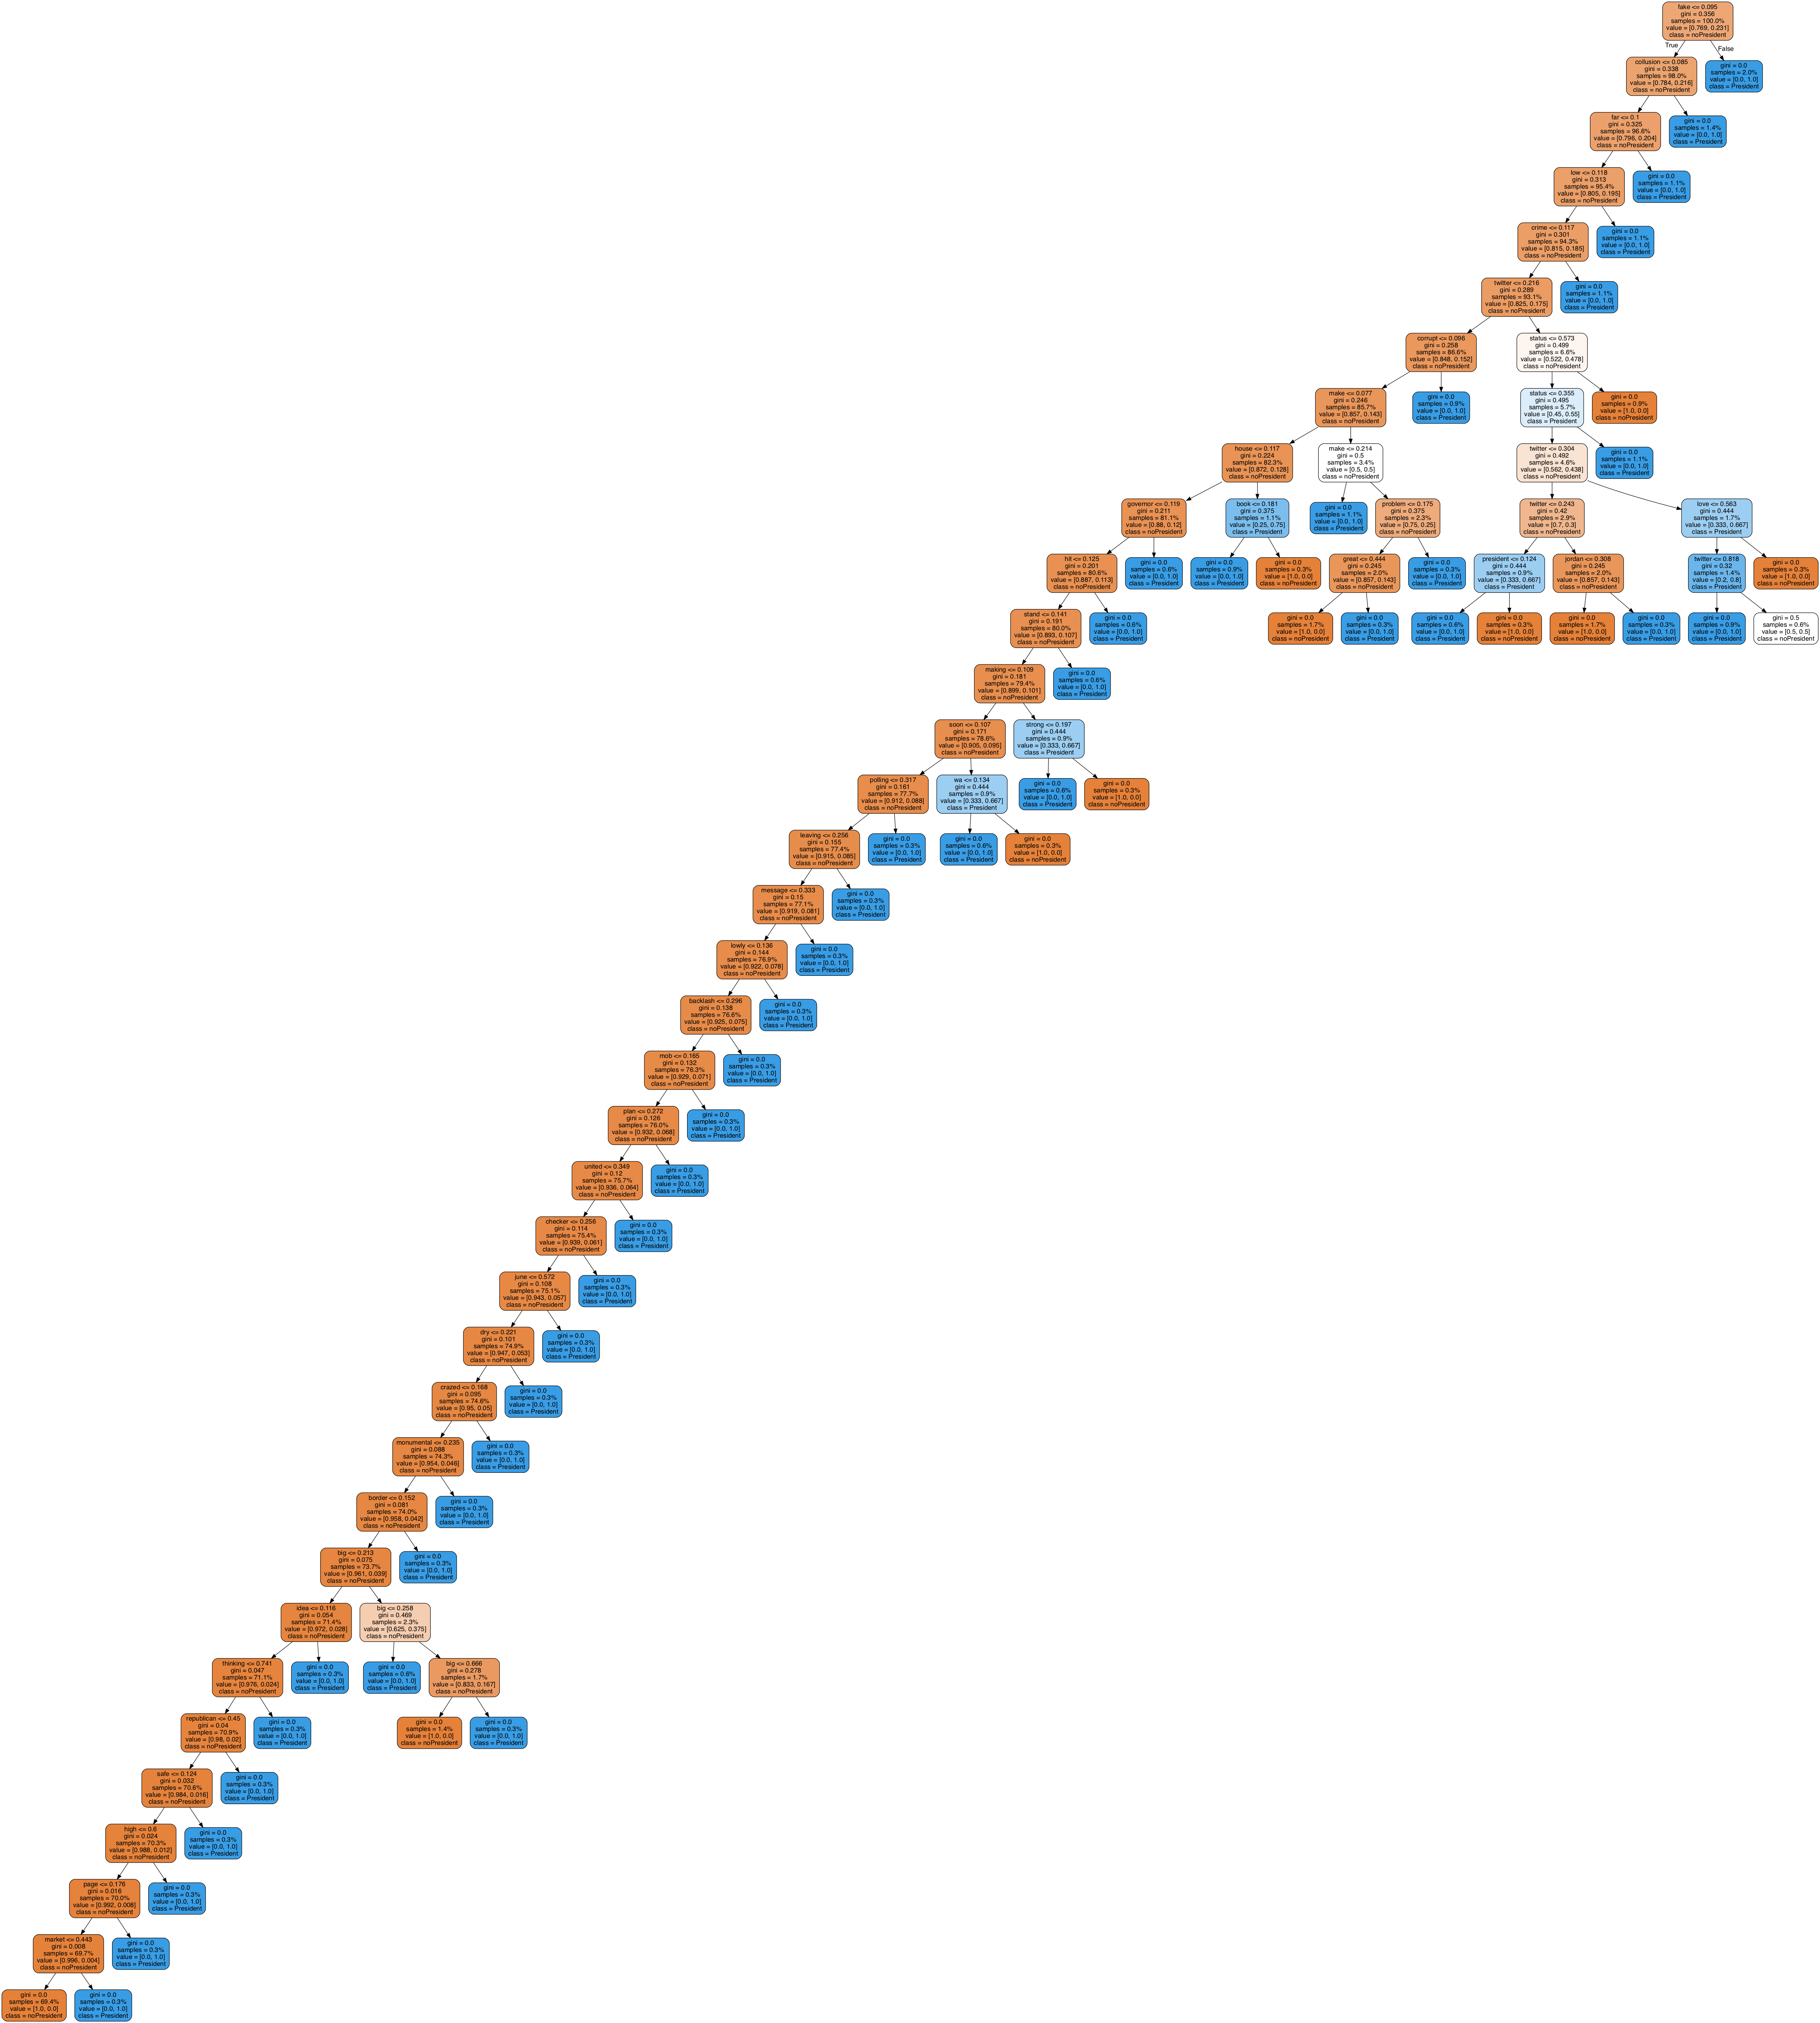

In [175]:
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=['noPresident', 'President'],
                                filled=True, rounded=True,
                                special_characters=False,
                                label='all', impurity=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [176]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
z = confusion_matrix(y_test, y_predict)

label_x = ['noPresident', 'President']
label_y = ['noPresident', 'President']

# change each element of z to type string for annotations
z_text = [[str(y) for y in label_x] for label_x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=label_x, y=label_y, annotation_text=z_text, colorscale='Viridis')

# add title
# fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
#                   )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted Value in X Axis",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real Value in Y Axis",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

# visualizations tree 2( limited tree depth and change the split of train/text set)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1:], test_size=0.3,
                                                    random_state=0)

In [178]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1, max_depth=5)

model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.837
Accuracy on test set: 0.787


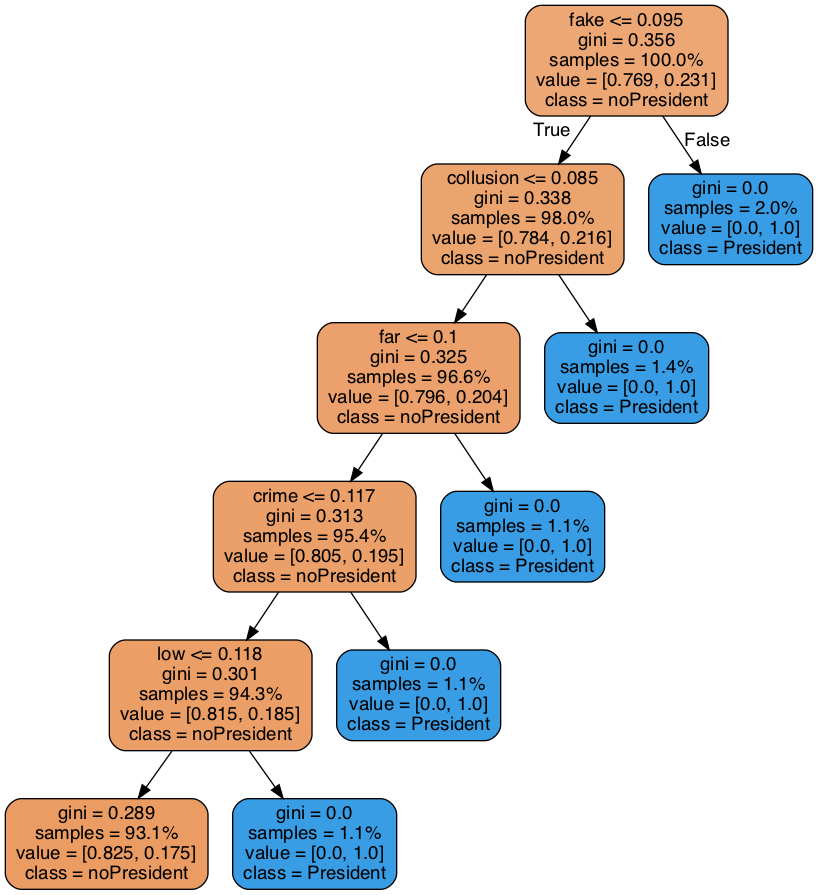

In [179]:
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=['noPresident', 'President'],
                                filled=True, rounded=True,
                                special_characters=False,
                                label='all', impurity=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [147]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
z = confusion_matrix(y_test, y_predict)

label_x = ['noPresident', 'President']
label_y = ['noPresident', 'President']

# change each element of z to type string for annotations
z_text = [[str(y) for y in label_x] for label_x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=label_x, y=label_y, annotation_text=z_text, colorscale='Viridis')

# add title
# fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
#                   )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted Value in X Axis",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real Value in Y Axis",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

# visualizations tree 3( limited tree depth and increase the data amount)

In [181]:
raw_text = pd.read_csv('/Users/junjiexie/Documents/gu校内生活/additionalData/trumptweets.csv')
raw_text = raw_text.sample(n=5000)
# please come back and re-run the data processing part

Accuracy on training set: 0.869
Accuracy on test set: 0.780


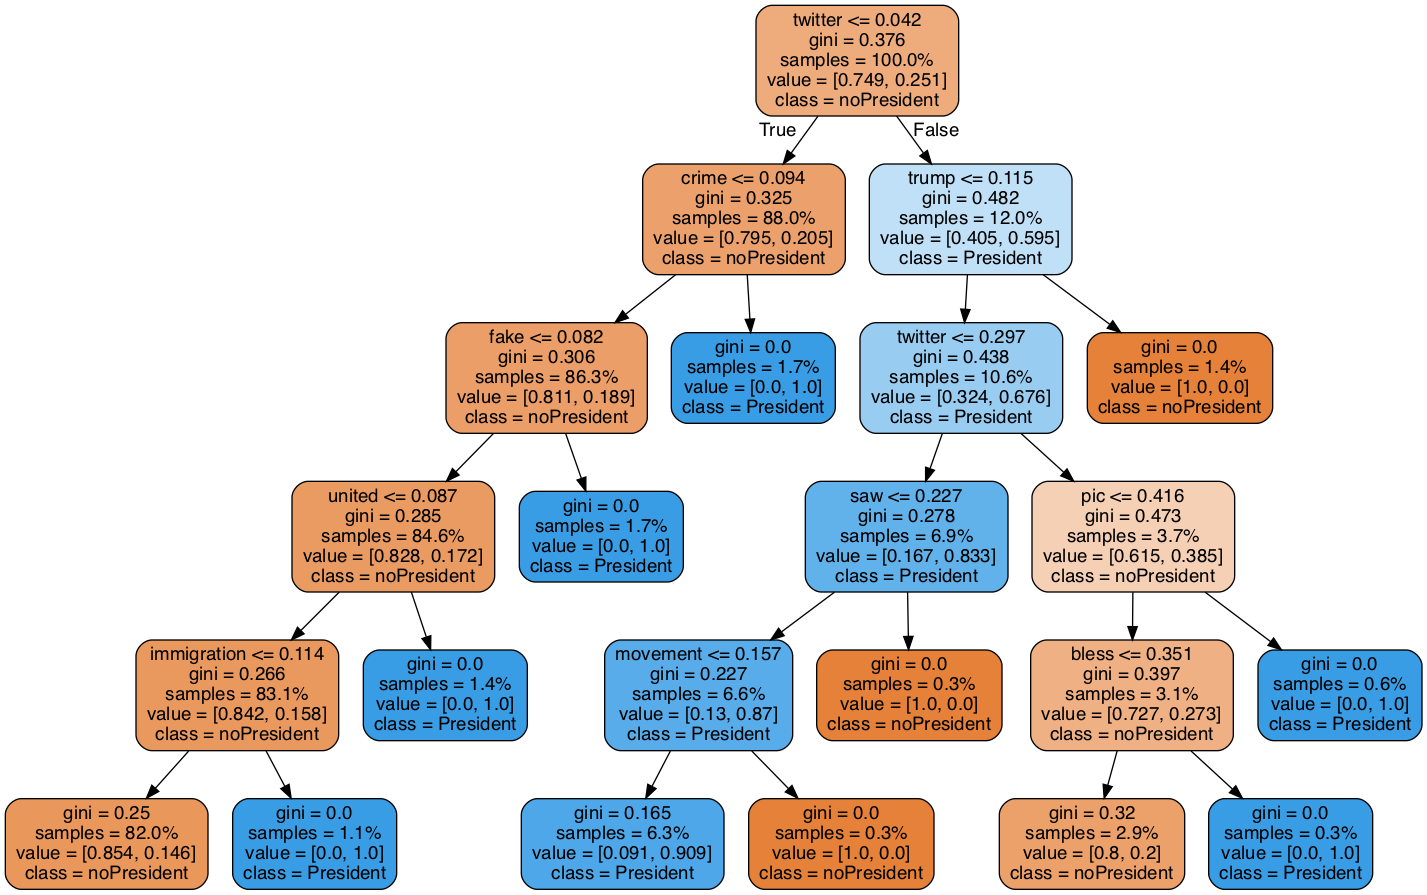

In [194]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1:], test_size=0.3,
                                                    random_state=1)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1, max_depth=5)

model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=['noPresident', 'President'],
                                filled=True, rounded=True,
                                special_characters=False,
                                label='all', impurity=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [160]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
z = confusion_matrix(y_test, y_predict)

label_x = ['noPresident', 'President']
label_y = ['noPresident', 'President']

# change each element of z to type string for annotations
z_text = [[str(y) for y in label_x] for label_x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=label_x, y=label_y, annotation_text=z_text, colorscale='Viridis')

# add title
# fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
#                   )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted Value in X Axis",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real Value in Y Axis",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()